# p23ds004 
# Data Mining Assignment 1

### 1. import libraries

In [1]:
#import libraries
#for data manipulation
import pandas as pd

#for visualization
import matplotlib.pyplot as plt

#for train test split
from sklearn.model_selection import train_test_split

#for decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#for tree visualization
from sklearn import tree

#for svm
from sklearn import svm

#for naive baise
from sklearn.naive_bayes import GaussianNB

#for knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for seaborn
import seaborn as sns

### 2. load dataset

dataset available at :https://archive.ics.uci.edu/static/public/732/darwin.zip

In [2]:
data = pd.read_csv("data.csv")
data

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,id_170,2930,0.000010,241.736477,176.115957,1839,6439,0.253347,0.174663,208.926217,...,0.119152,0.020909,4.508709,2.233198,96,44545,1798.923336,247448.3108,80335,H
170,id_171,2140,0.000009,274.728964,234.495802,2053,8487,0.225537,0.174920,254.612383,...,0.174495,0.017640,4.685573,2.806888,84,37560,1725.619941,160664.6464,345835,H
171,id_172,3830,0.000008,151.536989,171.104693,1287,7352,0.165480,0.161058,161.320841,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,H
172,id_173,1760,0.000008,289.518195,196.411138,1674,6946,0.518937,0.202613,242.964666,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,H


### 3. Exploratory Data Analysis

In [3]:
data.info

<bound method DataFrame.info of          ID  air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  \
0      id_1       5160     0.000013    120.804174       86.853334   
1      id_2      51980     0.000016    115.318238       83.448681   
2      id_3       2600     0.000010    229.933997      172.761858   
3      id_4       2130     0.000010    369.403342      183.193104   
4      id_5       2310     0.000007    257.997131      111.275889   
..      ...        ...          ...           ...             ...   
169  id_170       2930     0.000010    241.736477      176.115957   
170  id_171       2140     0.000009    274.728964      234.495802   
171  id_172       3830     0.000008    151.536989      171.104693   
172  id_173       1760     0.000008    289.518195      196.411138   
173  id_174       2875     0.000008    235.769350      178.208024   

     max_x_extension1  max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  \
0                 957              6601          0.361800 

In [4]:
data.describe()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,5664.166667,0.000010,297.666685,200.504413,1977.965517,7323.896552,0.416374,0.179823,249.085549,0.067556,...,221.360646,0.148286,0.019934,4.472643,2.871613,85.839080,43109.712644,1629.585962,163061.767360,1.642033e+05
std,12653.772746,0.000003,183.943181,111.629546,1648.306365,2188.290512,0.381837,0.064693,132.698462,0.074776,...,63.762013,0.062207,0.002388,1.501411,0.852809,27.485518,19092.024337,324.142316,56845.610814,4.969397e+05
min,65.000000,0.000002,28.734515,29.935835,754.000000,561.000000,0.067748,0.096631,41.199445,0.011861,...,69.928033,0.030169,0.014987,1.323565,0.950249,32.000000,15930.000000,474.049462,26984.926660,2.998000e+04
25%,1697.500000,0.000008,174.153023,136.524742,1362.500000,6124.000000,0.218209,0.146647,161.136182,0.029523,...,178.798382,0.107732,0.018301,3.485934,2.401199,66.000000,32803.750000,1499.112088,120099.046800,5.917500e+04
50%,2890.000000,0.000009,255.791452,176.494494,1681.000000,6975.500000,0.275184,0.163659,224.445268,0.039233,...,217.431621,0.140483,0.019488,4.510578,2.830672,81.000000,37312.500000,1729.385010,158236.771800,7.611500e+04
75%,4931.250000,0.000011,358.917885,234.052560,2082.750000,8298.500000,0.442706,0.188879,294.392298,0.071057,...,264.310776,0.199168,0.021134,5.212794,3.335828,101.500000,46533.750000,1865.626974,200921.078475,1.275425e+05
max,109965.000000,0.000028,1168.328276,865.210522,18602.000000,15783.000000,2.772566,0.627350,836.784702,0.543199,...,437.373267,0.375078,0.029227,10.416715,5.602909,209.000000,139575.000000,1999.775983,352981.850000,5.704200e+06


In [5]:
#Check for null values
data.isnull().sum()

ID                 0
air_time1          0
disp_index1        0
gmrt_in_air1       0
gmrt_on_paper1     0
                  ..
paper_time25       0
pressure_mean25    0
pressure_var25     0
total_time25       0
class              0
Length: 452, dtype: int64

### 4. First 18's

In [6]:
data_1 = data.iloc[:, 1:19]
data_1

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,mean_jerk_on_paper1,mean_speed_in_air1,mean_speed_on_paper1,num_of_pendown1,paper_time1,pressure_mean1,pressure_var1,total_time1
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,0.021547,1.828076,1.493242,22,10730,1679.232060,288285.0449,15890
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,0.016885,1.817744,1.517763,11,12460,1723.171348,210516.6356,64440
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,0.020126,3.378343,3.308866,10,6080,1520.253289,120845.8717,8680
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,0.021150,5.082499,3.542645,10,5595,1913.995532,100286.6032,7725
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,0.018590,3.804656,2.180544,8,4080,1819.121324,160061.8198,6390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2930,0.000010,241.736477,176.115957,1839,6439,0.253347,0.174663,208.926217,0.032691,0.022786,4.074893,3.390491,12,5835,1470.698372,235194.3615,8765
170,2140,0.000009,274.728964,234.495802,2053,8487,0.225537,0.174920,254.612383,0.032059,0.019521,4.149653,4.143594,10,4595,1880.668118,155216.3567,6735
171,3830,0.000008,151.536989,171.104693,1287,7352,0.165480,0.161058,161.320841,0.022705,0.022441,2.041489,3.507108,14,4060,1800.671182,212575.8020,7890
172,1760,0.000008,289.518195,196.411138,1674,6946,0.518937,0.202613,242.964666,0.090686,0.023634,4.385103,3.538417,8,4425,1881.701695,109235.0387,6185


In [7]:
data_columns = list(data_1.columns)

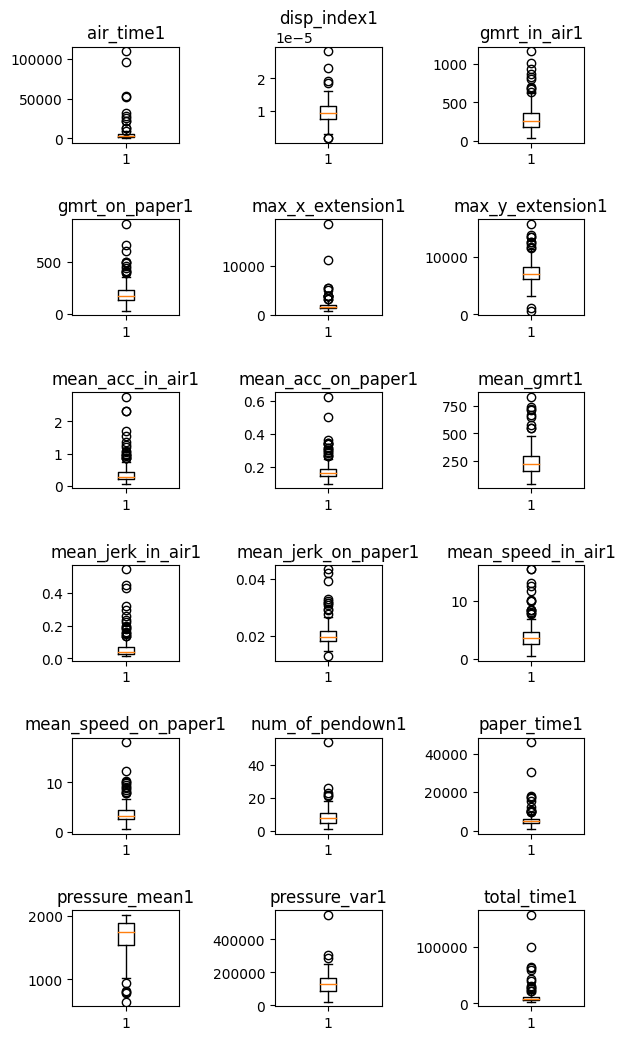

In [8]:
#Check for outliers


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.001, 
                    right=0.9, 
                    top=2, 
                    wspace=0.9, 
                    hspace=0.8)

data_columns = list(data_1.columns)

count = 1
for i in data_columns:
    plt.subplot(6, 3, count)
    plt.boxplot(data_1[i])
    plt.title(i)
    count += 1

plt.show()

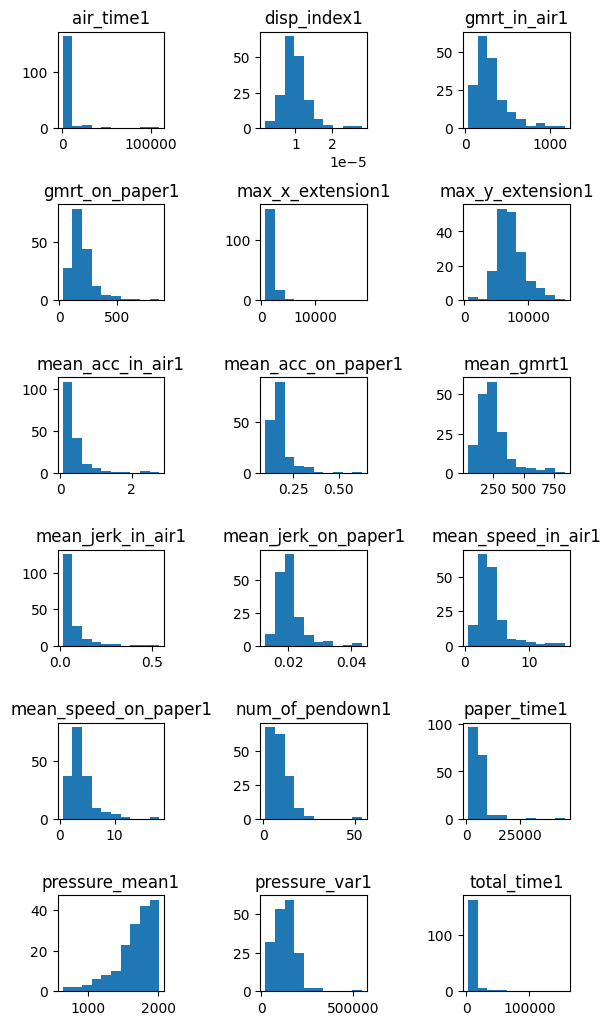

In [9]:
#Check for distribution


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.001, 
                    right=0.9, 
                    top=2, 
                    wspace=0.9, 
                    hspace=0.8)

data_columns = list(data_1.columns)

count = 1
for i in data_columns:
    plt.subplot(6, 3, count)
    plt.hist(data_1[i])
    plt.title(i)
    count += 1

plt.show()

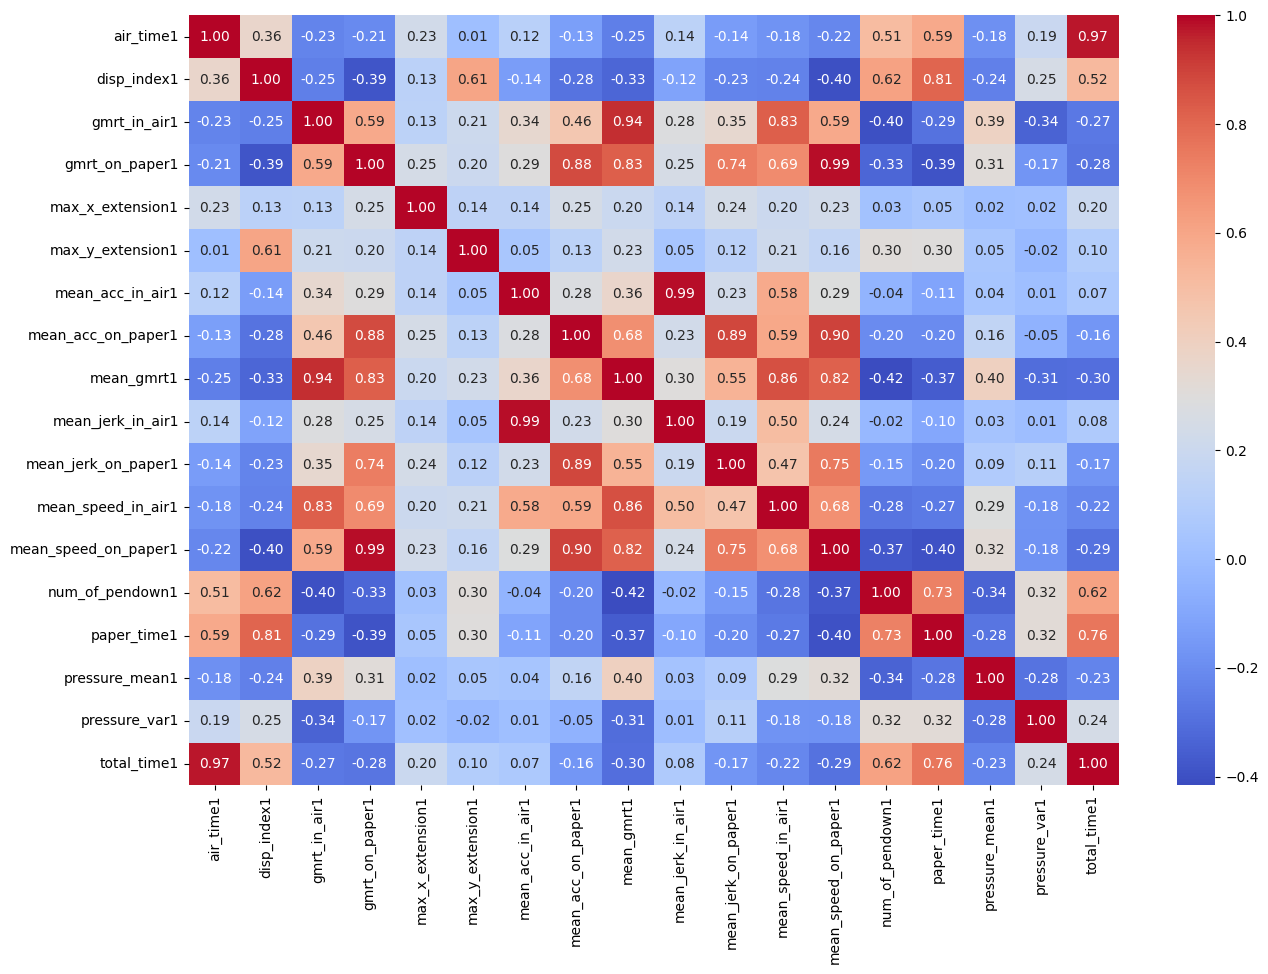

In [10]:
# Calculate correlation matrix
correlation_matrix = data_1.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### 5. Split Training and Testing Data

In [11]:
#gathering the data
X = data_1.values[: , 0 : data_1.shape[1]]
Y = data.values[: , data.shape[1] - 1]

#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

##### Function to check accuracy

In [12]:
def check_accuracy(y_predict, y_test):
    n = len(y_predict)
    i = 0
    true_value = 0
    
    while i < n:
        if y_predict[i] == y_test[i]:
            true_value = true_value + 1
        i = i + 1
    
    return round(true_value * 100 / n, 3)

#### Function to test

In [13]:
def test_function(model, X_train):
    y_predict = model.predict(X_train)
    
    return y_predict

### 6. Decision Tree

In [14]:
def create_model(cri, m_depth, r_state):
    #create object
    tree_object = DecisionTreeClassifier(criterion = cri, max_depth = m_depth, random_state = r_state)

    #fit model
    model = tree_object.fit(X_train, Y_train)
    
    column_names = ['air_time1', 'disp_index1', 'gmrt_in_air1', 'gmrt_on_paper1',
       'max_x_extension1', 'max_y_extension1', 'mean_acc_in_air1',
       'mean_acc_on_paper1', 'mean_gmrt1', 'mean_jerk_in_air1',
       'mean_jerk_on_paper1', 'mean_speed_in_air1', 'mean_speed_on_paper1',
       'num_of_pendown1', 'paper_time1', 'pressure_mean1', 'pressure_var1',
       'total_time1']
    
    #Visualize tree
    plt.subplots(nrows = 1, ncols = 1, figsize = (7, 6), dpi = 1000)
    tree.plot_tree(model, feature_names = column_names, class_names = ['p', 'h'])
    string = "Decision Tree: " + str(cri) + ", max depth:" + str(m_depth) + " and random state: " + str(r_state)
    plt.title(string)
    
    plt.show()
    
    return model

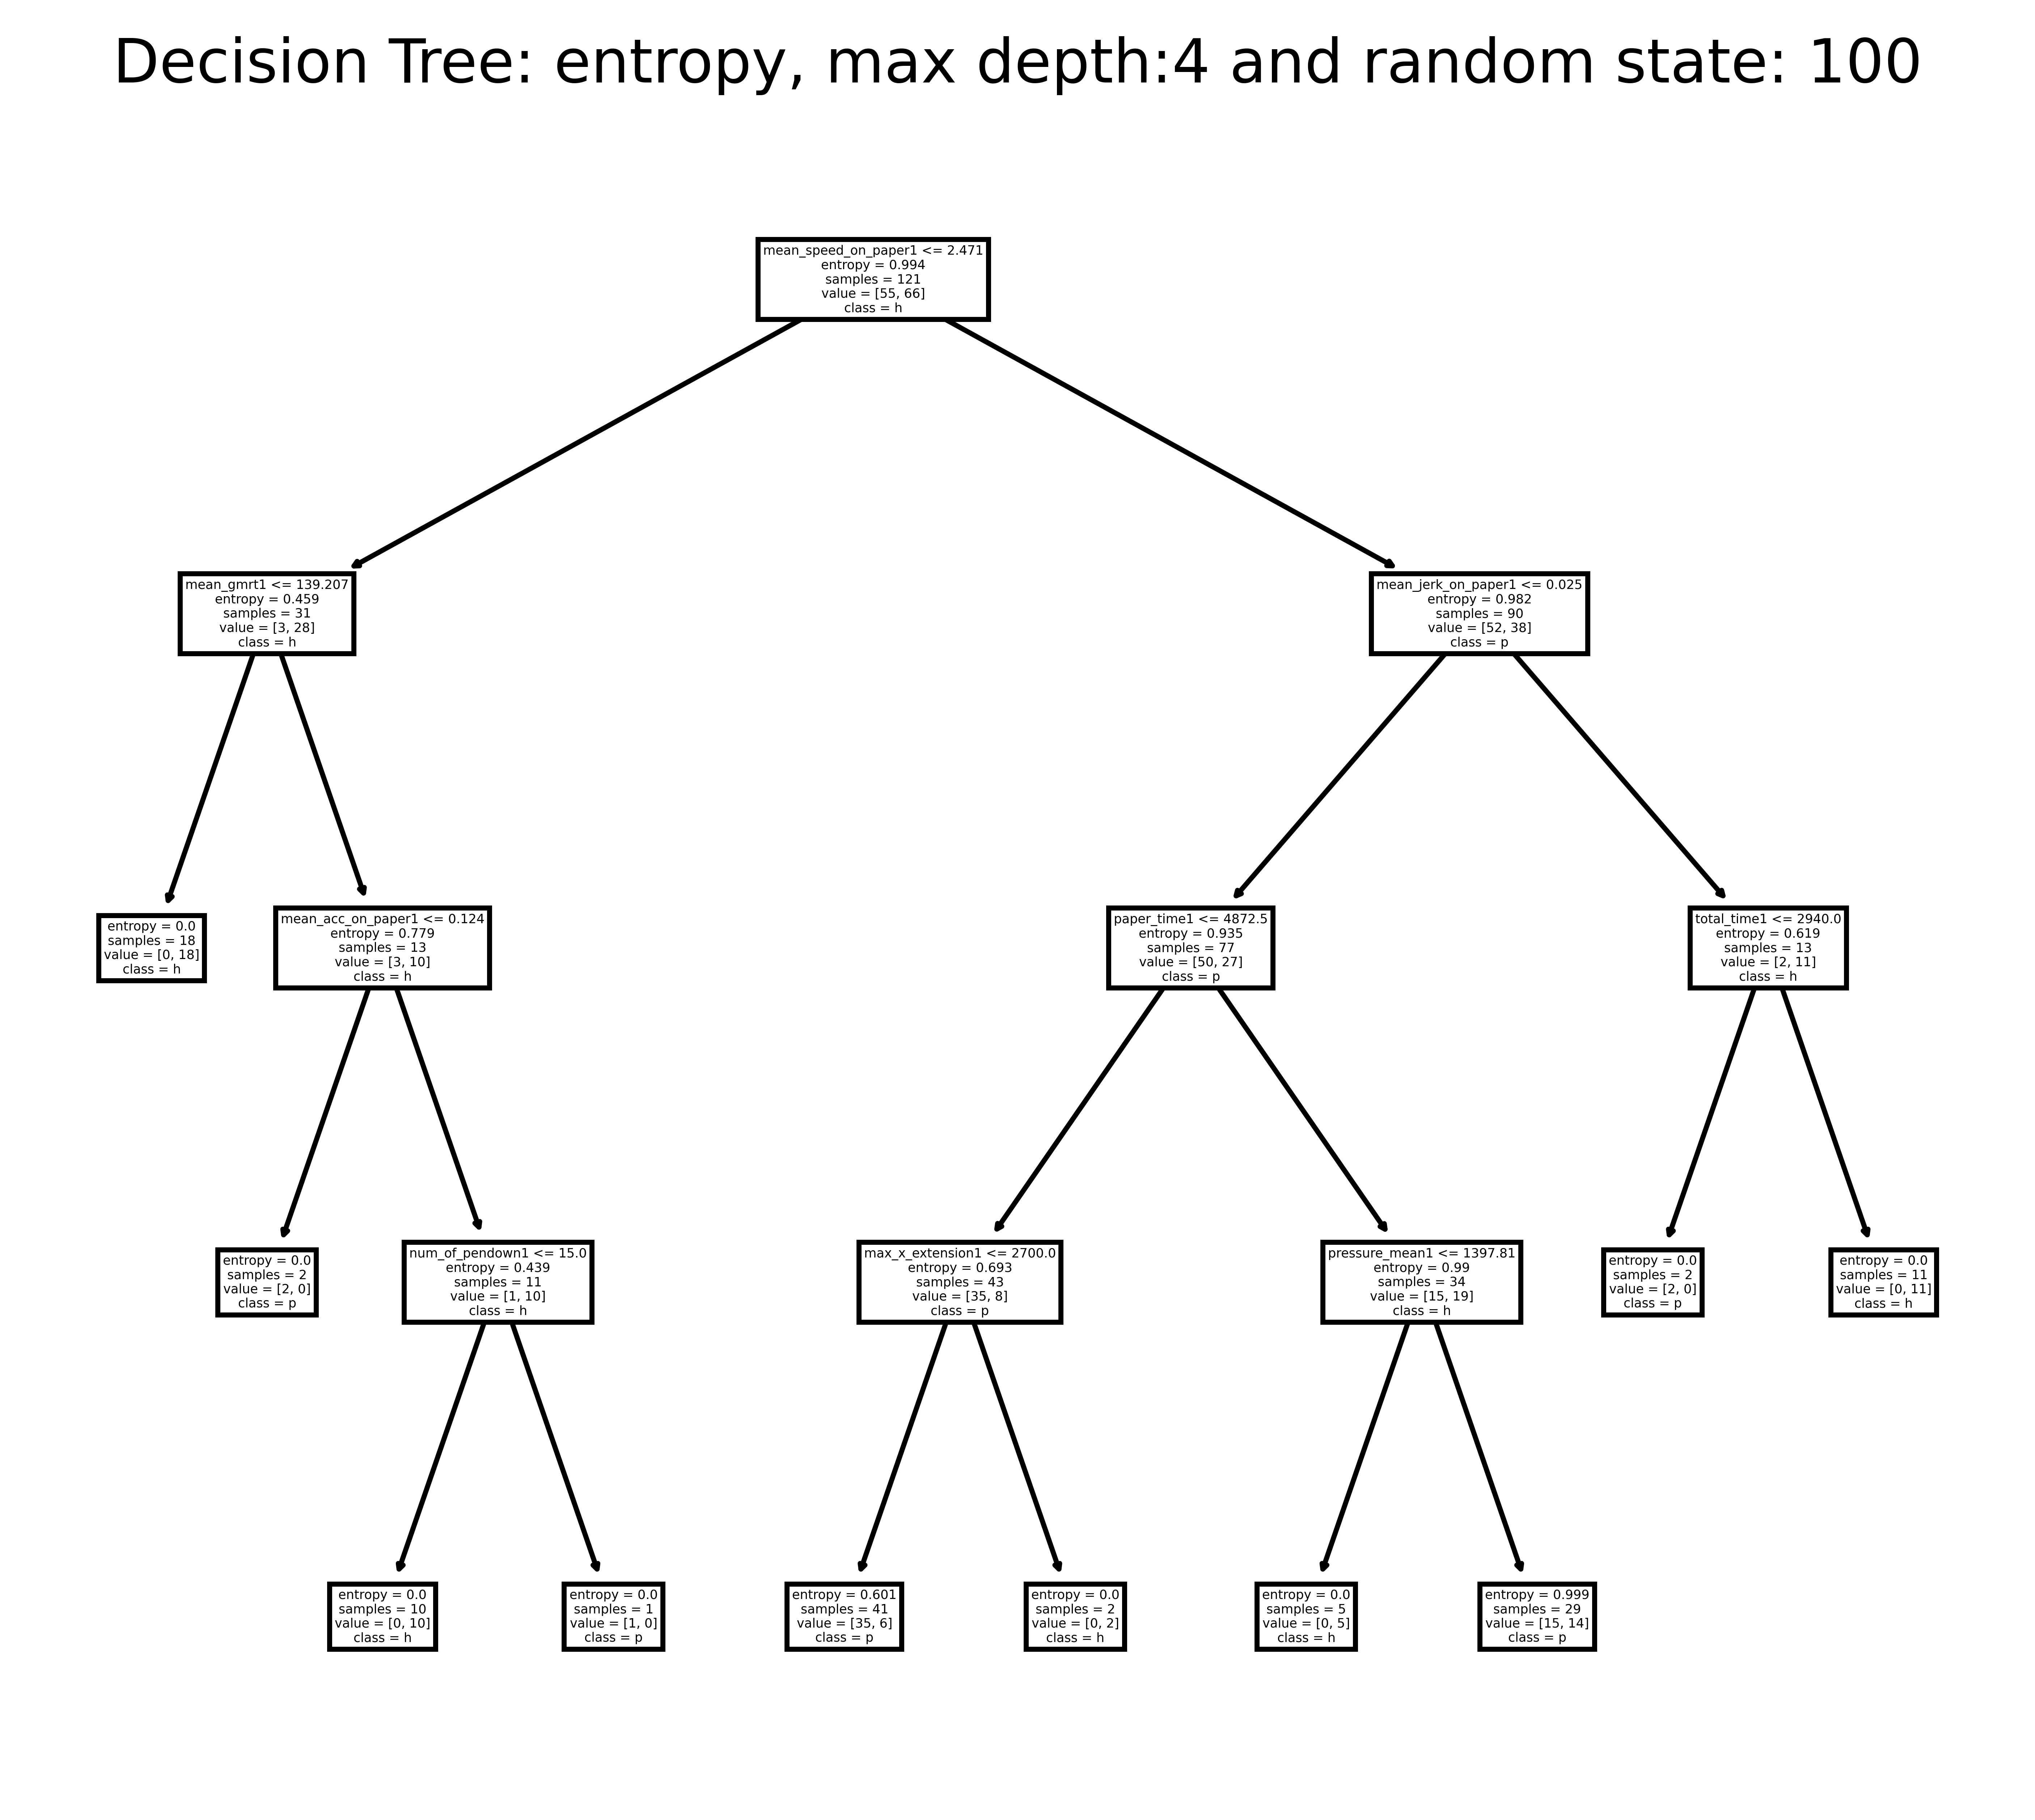

Accuracy:  69.811 %


In [15]:
model = create_model("entropy", 4, 100)

y_predict = test_function(model, X_test)
print("Accuracy: ", check_accuracy(y_predict, Y_test), "%")

### 7. Support Vector Machine

In [16]:
# Create a rbf kernel support vector machine model
svm = svm.SVC(kernel='rbf', gamma=0.1, C=10.0)
 
# Train the model on the training data
svm.fit(X_train, Y_train)
 
# Evaluate the model on the test data
accuracy = round(svm.score(X_test, Y_test)*100, 3)
print('Accuracy:', accuracy, "%")

Accuracy: 43.396 %


### 8. Gaussian Naive Bayes classifier

In [17]:
# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, Y_train)
 
# Predict the labels for the test set
y_predict = gnb.predict(X_test)

# Calculate the accuracy
accuracy = check_accuracy(y_predict, Y_test)
print(f'Accuracy: {accuracy}%')

Accuracy: 73.585%


### 9. K Nearest Neighbor

In [18]:
#KNN
#create model
k = 10
clf = KNeighborsClassifier(n_neighbors = k)

#Train model
clf.fit(X_train, Y_train)

#Test model
test_score = round(clf.score(X_test, Y_test)*100, 3)
print("Accuracy: ", test_score, "%")

Accuracy:  50.943 %


### 10. Rest 24 feature sets

In [19]:
#Create Accuracy List
#Values for first dataset
dt_a = [69.811]
svm_a = [43.396]
gnbc_a = [73.585]
knn_a = [50.943]

count = 2

while count <= 25:
    #data extraction
    temp_data = data.iloc[:, 19*(count-1)-(count-2):19*(count-1)-(count-2)+18]
    
    
    #extract independent variables
    X = temp_data.values[: , 0 : temp_data.shape[1]]

    
    
    #Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
    
    
    
    
    #decision tree
    ###create object
    tree_object = DecisionTreeClassifier(criterion = "entropy", max_depth = 4, random_state = 100)

    ###fit model
    tree_model = tree_object.fit(X_train, Y_train)
    
    ###check accuracy
    y_predict = test_function(tree_model, X_test)
    dt_a.append(check_accuracy(y_predict, Y_test))

    
    
    
    #support vector machine
    # Create a rbf kernel support vector machine model
    from sklearn import svm
    from sklearn.svm import SVC
    svm = svm.SVC(kernel='rbf', gamma=0.1, C=10.0)
 
    # Train the model on the training data
    svm.fit(X_train, Y_train)
 
    # Evaluate the model on the test data
    accuracy = round(svm.score(X_test, Y_test)*100, 3)
    svm_a.append(accuracy)
    
    
    
    
    #gaussian Naive Bayes classifier
    # Initialize the Gaussian Naive Bayes classifier
    gnb = GaussianNB()

    # Train the model
    gnb.fit(X_train, Y_train)
 
    # Predict the labels for the test set
    y_predict = gnb.predict(X_test)

    # Calculate the accuracy
    accuracy = check_accuracy(y_predict, Y_test)
    gnbc_a.append(accuracy)
    
    
    
    
    #k nearest neighbor
    #create model
    k = 10
    clf = KNeighborsClassifier(n_neighbors = k)

    #Train model
    clf.fit(X_train, Y_train) 

    #Test model
    test_score = round(clf.score(X_test, Y_test)*100, 3)
    knn_a.append(test_score)
    
    
    
    
    #increment count
    count += 1
    print("Dataset", count-1, "completed")

Dataset 2 completed
Dataset 3 completed
Dataset 4 completed
Dataset 5 completed
Dataset 6 completed
Dataset 7 completed
Dataset 8 completed
Dataset 9 completed
Dataset 10 completed
Dataset 11 completed
Dataset 12 completed
Dataset 13 completed
Dataset 14 completed
Dataset 15 completed
Dataset 16 completed
Dataset 17 completed
Dataset 18 completed
Dataset 19 completed
Dataset 20 completed
Dataset 21 completed
Dataset 22 completed
Dataset 23 completed
Dataset 24 completed
Dataset 25 completed


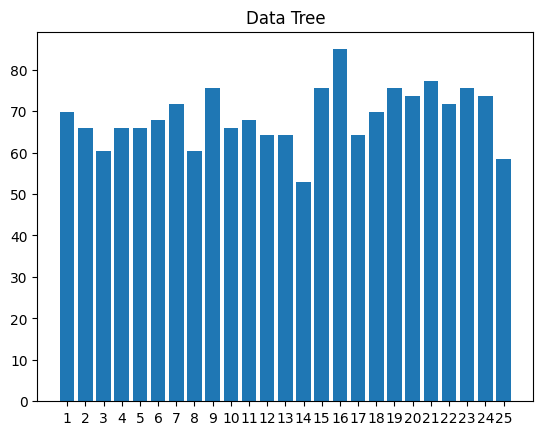

In [20]:
x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
plt.bar(x, dt_a)
plt.title("Data Tree")
plt.show()

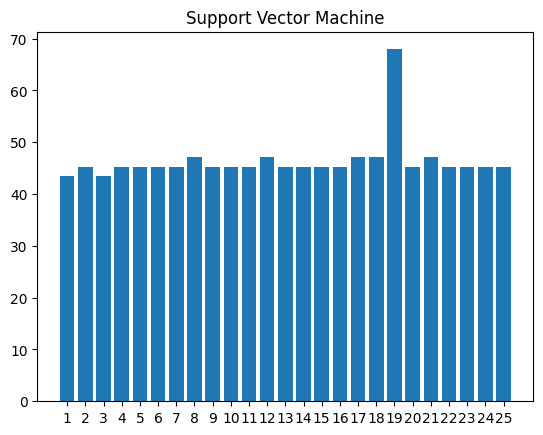

In [21]:
plt.bar(x, svm_a)
plt.title("Support Vector Machine")
plt.show()

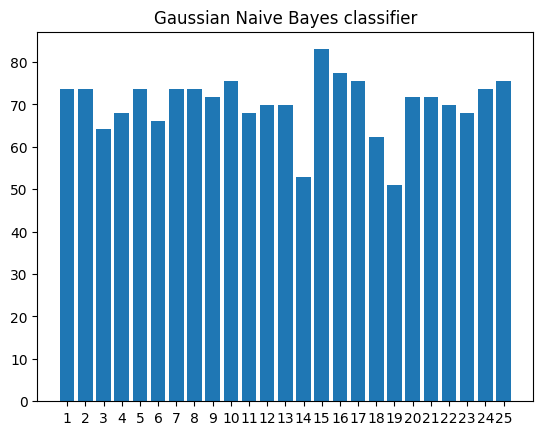

In [22]:
plt.bar(x, gnbc_a)
plt.title("Gaussian Naive Bayes classifier")
plt.show()

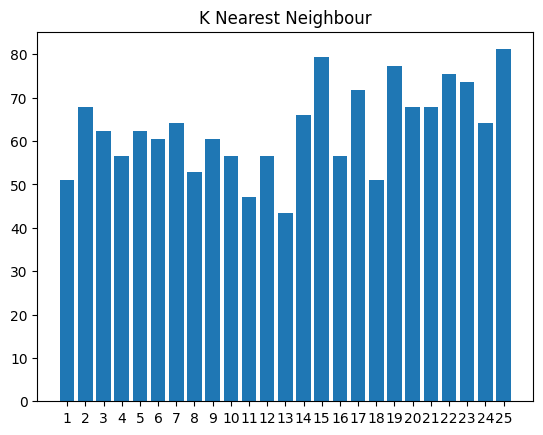

In [23]:
plt.bar(x, knn_a)
plt.title("K Nearest Neighbour")
plt.show()

### 11. Conclusion

1. From Decision Tree Classification, highest accuracy dataset is 16th.
2. From Support Vector Machine Classification, highest accuracy dataset is 19th.
3. From Gaussian Naive Bayes classifier, highest accuracy dataset is 15th.
4. From K Nearest Neighbour, highest accuracy dataset is 25th.